# Testing intuition about least-squares best fits
#### by Elizabeth Barnes

In [1]:
#.............................................
# IMPORT STATEMENTS
#.............................................
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from scipy import stats, odr
import numpy.linalg as LA

#.............................................
# PLOTTING COMMANDS
#.............................................
import matplotlib as mpl

# set figure defaults
mpl.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (12.0/2, 8.0/2)


Let's first make some data to practice fitting a line using ```stats.linregress```.

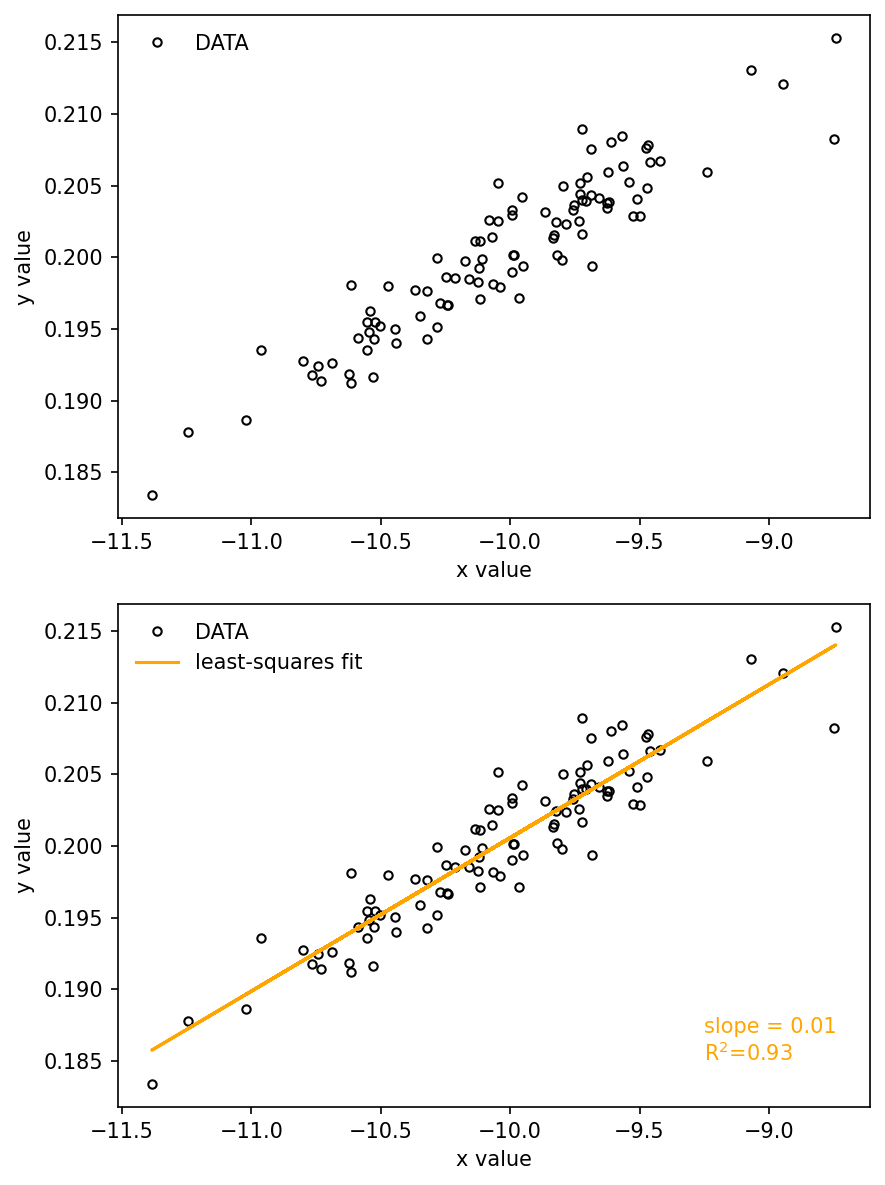

In [2]:
# set random state so that we get the same random noise every time
np.random.seed(22)
x_new = .5*np.random.randn(100)-10.
y_new = .01*x_new + .002*np.random.randn(len(x_new))+.3
slope, intercept, r_value, p_value, std_err = stats.linregress(x_new,y_new)      

plt.figure(figsize=(6,8))
#plot the data points
plt.subplot(2,1,1)
plt.plot(x_new,y_new,'ok',markersize = 4, markerfacecolor="None", color='black',label='DATA')
plt.ylabel('y value')
plt.xlabel('x value')
plt.legend(frameon = 0, loc = 'upper left')

plt.subplot(2,1,2)
plt.plot(x_new,y_new,'ok',markersize = 4, markerfacecolor="None", color='black',label='DATA')
plt.ylabel('y value')
plt.xlabel('x value')
plt.plot(x_new,intercept+x_new*slope,'-',color = 'orange', label = 'least-squares fit')
plt.text(-9.25,.185,'slope = ' + str(np.round(slope,2)) + '\nR$^2$=' + str(np.round(r_value,2)), color='orange')    
plt.legend(frameon = 0, loc = 'upper left')


plt.tight_layout()    
plt.show()

Now let's make slightly more complicated data. Specifically, the same data as above but now with 50 points that are actually from an exponential. What does the best fit line look like now? How does it compare to the best fit lines of the two types of data (i.e. linear and exponential) separately?

In [3]:
# set random state so that we get the same random noise every time
np.random.seed(22)

#setup my data
N = 50
x = 5.*np.random.randn(N)
y = np.exp(.2*(x + 2.*np.random.randn(len(x))))

x_new = .5*np.random.randn(100)-10.
y_new = .01*x_new + .002*np.random.randn(len(x_new))+.3

x_all = np.append(x,x_new)
y_all = np.append(y,y_new)


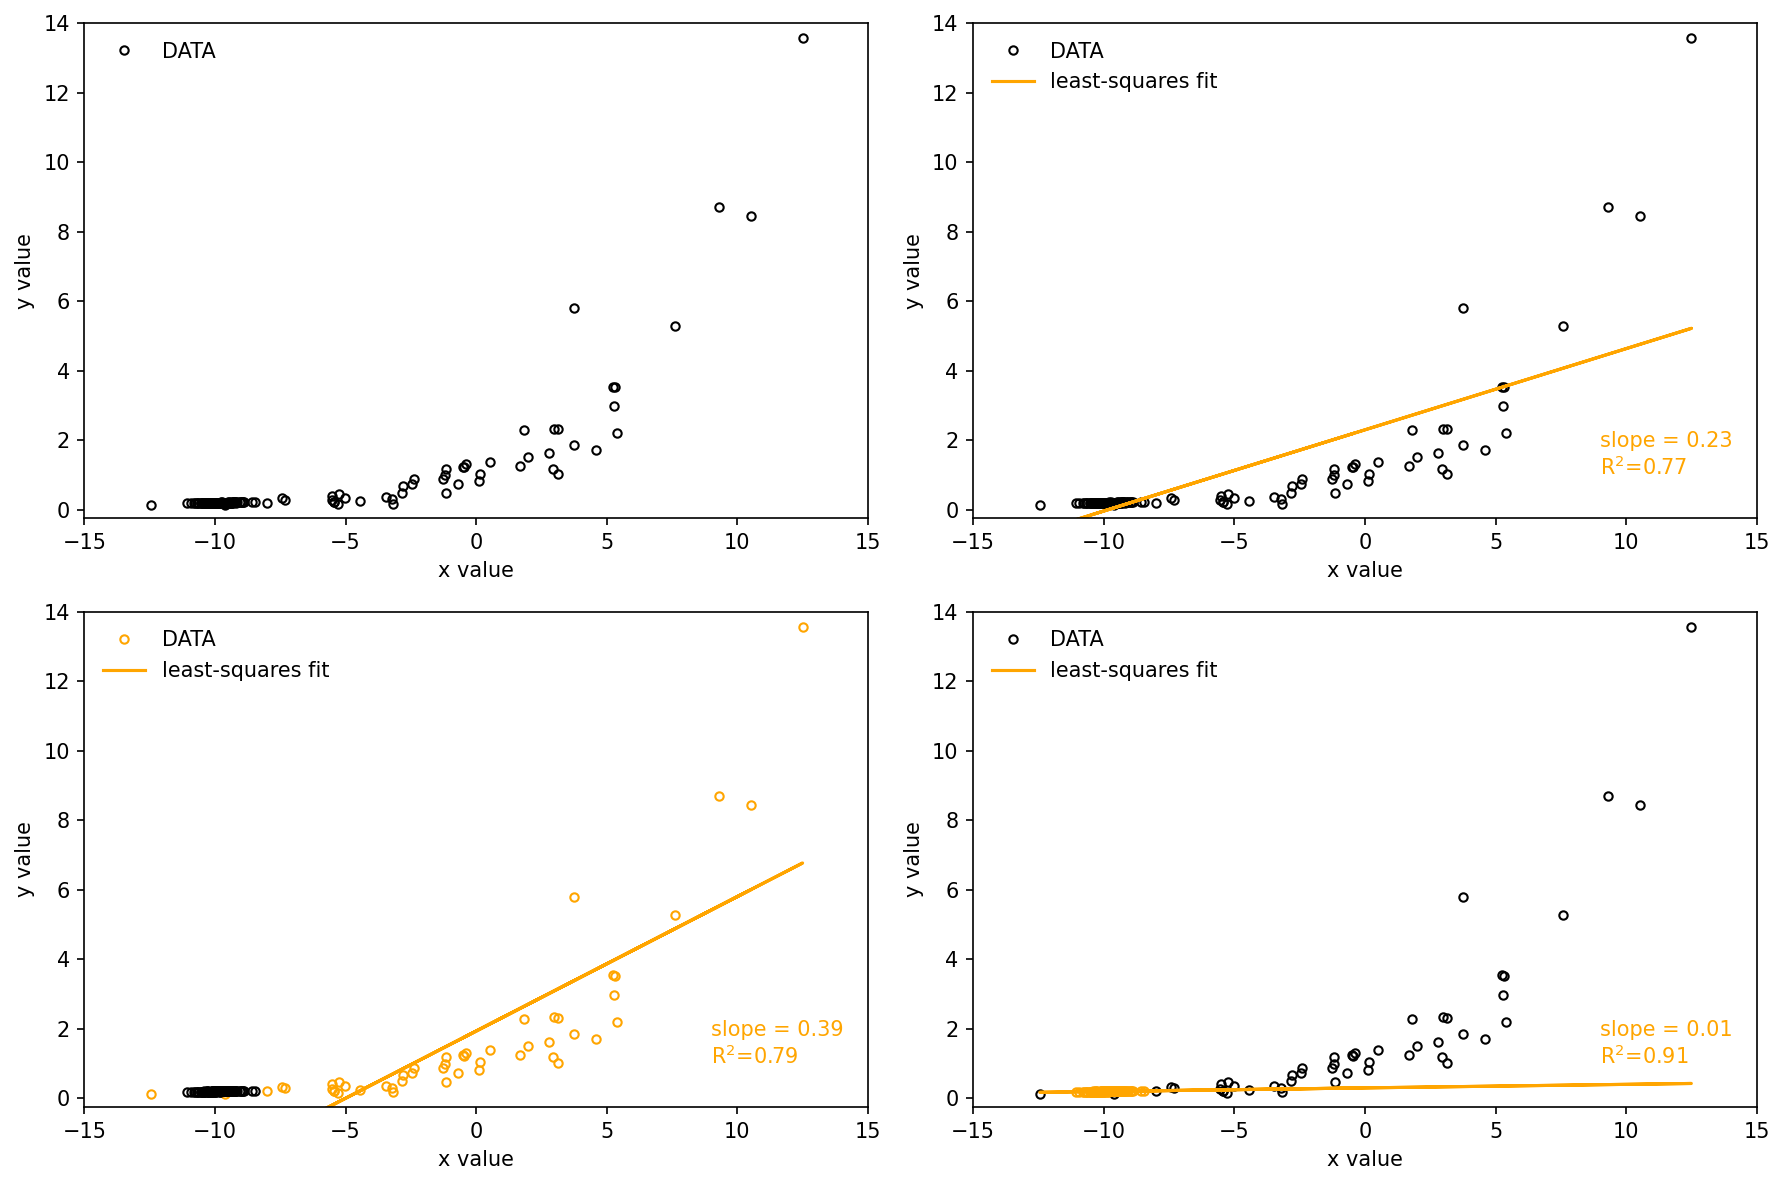

In [4]:
plt.figure(figsize=(12,8))

for fit_type in ('none','all', 'exp', 'small'):

    # compute the best fit
    if(fit_type=='none'):
        i = 0
        clr,clr_new = ('black','black')
        slope, intercept, r_value = (np.nan,np.nan,np.nan)
    elif(fit_type=='all'):
        i = 1
        clr,clr_new = ('black','black')
        slope, intercept, r_value, p_value, std_err = stats.linregress(x_all,y_all)    
    elif(fit_type=='exp'):
        i = 2        
        clr,clr_new = ('orange','black')
        slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)      
    elif(fit_type=='small'):
        i = 3        
        clr,clr_new = ('black','orange')        
        slope, intercept, r_value, p_value, std_err = stats.linregress(x_new,y_new)      
    else:
        raise ValueError('no such type.')

    #plot the data points
    plt.subplot(2,2,i+1)
    plt.plot(x,y,'ok',markersize = 4, label = 'DATA', markerfacecolor="None", color=clr)
    plt.plot(x_new,y_new,'ok',markersize = 4, markerfacecolor="None", color=clr_new)
    if(i>0):
        plt.plot(x_all,intercept+x_all*slope,'-',color = 'orange', label = 'least-squares fit')
        plt.text(9,1.,'slope = ' + str(np.round(slope,2)) + '\nR$^2$=' + str(np.round(r_value,2)), color='orange')    
    plt.ylabel('y value')
    plt.xlabel('x value')
    plt.legend(frameon = 0, loc = 'upper left')
    plt.xlim([-15,15])
    plt.ylim([-.25, 14.])

plt.tight_layout()    
plt.show()